# Import Libraries

In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from matplotlib.image import imread

import warnings
warnings.filterwarnings('ignore')

# Dataset Overview

In [9]:
path_file = '/Users/erlandoregita/Downloads/cell_images'
os.listdir(path_file) 

['.DS_Store', 'test', 'train']

In [21]:
test_path = path_file+'/test/'
train_path = path_file+'/train/'

In [22]:
os.listdir(test_path)

['.DS_Store', 'parasitized', 'uninfected']

In [23]:
os.listdir(train_path)

['parasitized', 'uninfected']

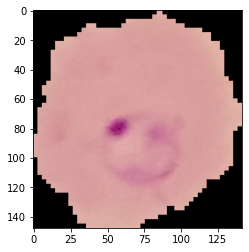

In [26]:
# show glimpse image
para_cell = train_path+'/parasitized'+'/C100P61ThinF_IMG_20150918_144104_cell_162.png'
para_img = imread(para_cell)
plt.imshow(para_img)

In [28]:
# show glimpse image
para_cell1 = train_path+'/parasitized'+'/C100P61ThinF_IMG_20150918_144104_cell_162.png'
para_img1 = imread(para_cell1)

para_cell2 = train_path+'/parasitized'+'/C33P1thinF_IMG_20150619_120838a_cell_222.png'
para_img2 = imread(para_cell2)

para_cell3 = train_path+'/uninfected'+'/C1_thinF_IMG_20150604_104722_cell_143.png'
para_img3 = imread(para_cell3)

para_cell4 = train_path+'/uninfected'+'/C1_thinF_IMG_20150604_104722_cell_242.png'
para_img4 = imread(para_cell4)

In [33]:
# check dimension
para_img1.shape, para_img2.shape, para_img3.shape, para_img4.shape

((148, 142, 3), (148, 145, 3), (136, 151, 3), (124, 136, 3))

We need to readjust make all the dimension in the same dimension

Text(0.5, 1.0, 'Uninfected 2')

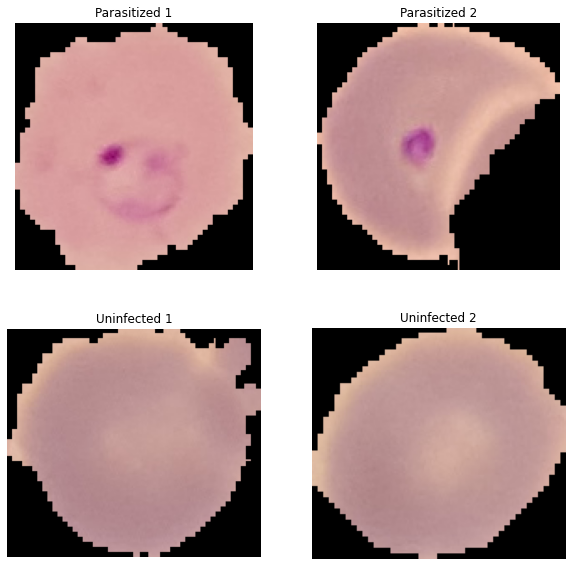

In [29]:
# visualize
rows = 2
columns = 2
fig = plt.figure(figsize=(10, 10))

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(para_img1)
plt.axis('off')
plt.title("Parasitized 1")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(para_img2)
plt.axis('off')
plt.title("Parasitized 2")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(para_img3)
plt.axis('off')
plt.title("Uninfected 1")

# Adds a subplot at the 4st position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(para_img4)
plt.axis('off')
plt.title("Uninfected 2")

In [30]:
# check len
print(len(os.listdir(train_path+'/parasitized')))
print(len(os.listdir(test_path+'/parasitized')))

12480
1300


In [34]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/uninfected'):
    
    img = imread(test_path+'/uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [ ]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python

In [35]:
# check average dimension
np.mean(dim1), np.mean(dim2)

(130.92538461538462, 130.75)

In [36]:
# convert dimension
image_shape = (130,130,3)

# Image Preprocessing

In [41]:
# manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images 
# that our data set doesn't have

from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range=20,        # rotate the image 20 degrees
                               width_shift_range=0.10,   # Shift the pic width by a max of 5%
                               height_shift_range=0.10,  # Shift the pic height by a max of 5%
                               rescale=1/255,            # Rescale the image by normalzing it.
                               shear_range=0.1,          # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1,           # Zoom in by 10% max
                               horizontal_flip=True,     # Allo horizontal flipping
                               fill_mode='nearest'       # Fill in missing pixels with the nearest filled value
                              )

Text(0.5, 1.0, 'Parasitized Manipulated 2')

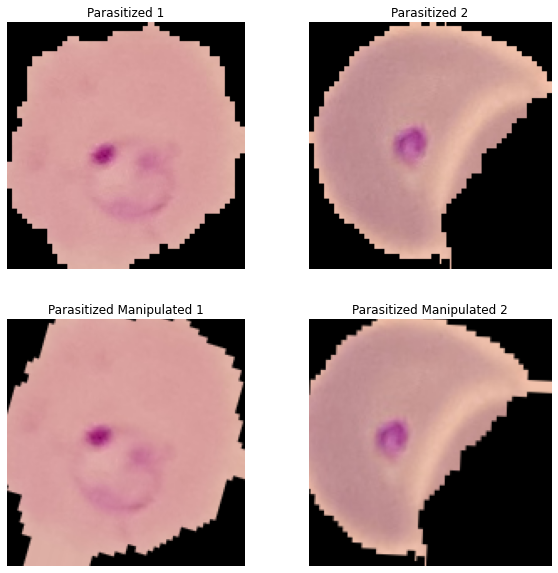

In [45]:
# visualize
rows = 2
columns = 2
fig = plt.figure(figsize=(10, 10))

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(para_img1)
plt.axis('off')
plt.title("Parasitized 1")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(para_img2)
plt.axis('off')
plt.title("Parasitized 2")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(image_gen.random_transform(para_img1))
plt.axis('off')
plt.title("Parasitized Manipulated 1")

# Adds a subplot at the 4st position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(image_gen.random_transform(para_img2))
plt.axis('off')
plt.title("Parasitized Manipulated 2")

In [46]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [47]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Modeling

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

## Build Model

In [49]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, its binary so we use sigmoid activation function
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2022-08-25 21:31:07.145143: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [51]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

# Training

In [52]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=20,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [53]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=20,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [54]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [56]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                              callbacks=[early_stop])

Epoch 1/20
1248/1248 [==============================] - 555s 443ms/step - loss: 0.5742 - accuracy: 0.6833 - val_loss: 0.3122 - val_accuracy: 0.9004
Epoch 2/20
1248/1248 [==============================] - 528s 423ms/step - loss: 0.2398 - accuracy: 0.9252 - val_loss: 0.1868 - val_accuracy: 0.9369
Epoch 3/20
1248/1248 [==============================] - 544s 436ms/step - loss: 0.1770 - accuracy: 0.9445 - val_loss: 0.1597 - val_accuracy: 0.9481
Epoch 4/20
1248/1248 [==============================] - 711s 570ms/step - loss: 0.1679 - accuracy: 0.9474 - val_loss: 0.1672 - val_accuracy: 0.9438
Epoch 5/20
1248/1248 [==============================] - 699s 560ms/step - loss: 0.1615 - accuracy: 0.9489 - val_loss: 0.1507 - val_accuracy: 0.9473
Epoch 6/20
1248/1248 [==============================] - 638s 511ms/step - loss: 0.1562 - accuracy: 0.9513 - val_loss: 0.1678 - val_accuracy: 0.9454
Epoch 7/20
1248/1248 [==============================] - 588s 471ms/step - loss: 0.1580 - accuracy: 0.9502 - val_

In [57]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

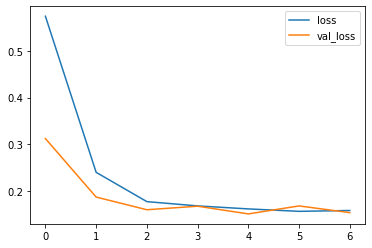

In [58]:
losses[['loss','val_loss']].plot()

In [59]:
model.evaluate_generator(test_image_gen)

[0.1566258668899536, 0.948846161365509]

In [61]:
from tensorflow.keras.preprocessing import image

# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

In [62]:
predictions = pred_probabilities > 0.5

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1300
           1       0.93      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [64]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1210,   90],
       [  46, 1254]])